# What is the optimal skill to learn for data analysts?

## Methodology

1- Group skills to determine median salary and liklyhood of being in posting

2- visualize median salary vs percent skill demand

3- Determine if certain technologies are more prevalent





In [36]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# merge dataframes 

In [37]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


In [38]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [39]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False)
df_DA_skills = df_DA_skills.rename(columns = {'count': 'skill_count', 'median' : 'median_salary'})
df_DA_skills


,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [40]:
DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [41]:
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


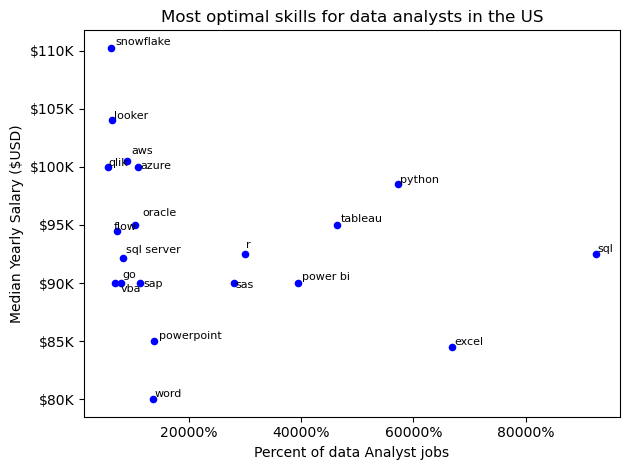

In [47]:
from adjustText import adjust_text

df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')

df_DA_skills_high_demand = df_exploded.groupby('job_skills').agg(
    skill_percent = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_percent = 20
df_DA_skills_high_demand = df_DA_skills_high_demand.sort_values(by = 'skill_percent', ascending = False).head(skill_percent)


df_DA_skills_high_demand.plot(kind = 'scatter', x = 'skill_percent', y = 'median_salary', color ='blue')

text =[] # list to hold text objects
text_list = []  # Renamed the list to avoid conflict
for i, skill_text in enumerate(df_DA_skills_high_demand.index):
    # Append text objects to the list using the renamed variable
    text_list.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                            df_DA_skills_high_demand['median_salary'].iloc[i], 
                            skill_text,  # Use the skill name from the loop variable
                            fontsize=8))
adjust_text(text_list)

plt.xlabel('Percent of data Analyst jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most optimal skills for data analysts in the US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.tight_layout()
plt.show()